In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [45]:
df = pd.read_excel(r"D:\Research\Isaacs Lab\DeepAxon\Charles Data.xlsx", sheet_name='Full Data (Per Image)')
df = df[df['image_id']!='22G-13-6 40x A2.1']
ctrl = df[df['group']=='control']

In [46]:
ip = df[df['software'] == 'ip']
da_major = df[df['software'] == 'da_major']
da_avg = df[df['software'] == 'da_avg']

In [47]:
ip_ctrl = ctrl[ctrl['software']=='ip']
da_major_ctrl = ctrl[ctrl['software']=='da_major']
da_avg_ctrl = ctrl[ctrl['software']=='da_avg']
da_full_major_ctrl = ctrl[ctrl['software']=='da_full_major']
da_full_avg_ctrl = ctrl[ctrl['software']=='da_full_avg']

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee0681e580>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee0681e520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee0681e0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee0681e6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee0600f220>],
 'means': []}

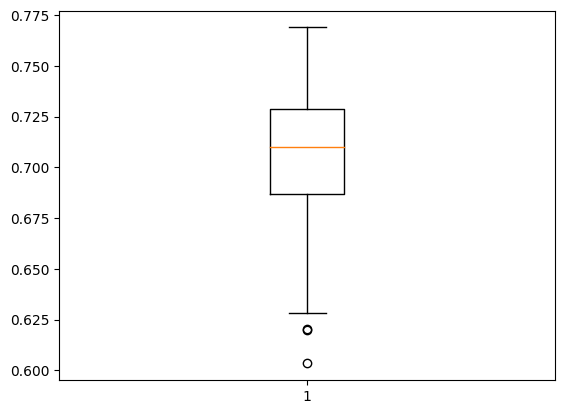

In [48]:
plt.boxplot(ip_ctrl['gratio_avg'])

In [49]:
q1 = ip_ctrl['gratio_avg'].quantile(0.25)
q3 = ip_ctrl['gratio_avg'].quantile(0.75)
iqr = q3 - q1

thresh = 1.5
outliers = ip_ctrl[(ip_ctrl['gratio_avg']<q1-thresh*iqr) | (ip_ctrl['gratio_avg']>q3+thresh*iqr)]
outliers

,subject_id,animal_id,group,month,software,image_num,image_id,area_analyzed,axon_count,gratio_avg,diamter_avg
365,CONTROL_3,21G-20-27,control,0,ip,x2,21G-20-27 40X2,53018,303,0.619839,NaN
366,CONTROL_3,21G-20-27,control,0,ip,x3,21G-20-27 40X3,56530,779,0.620456,NaN
448,CONTROL_4,22G-13-33,control,0,ip,x4,22G-13-33 40x A1.4,54168,460,0.603376,NaN


Full Analysis of IP vs DA

In [50]:
stats.ttest_rel(ip['gratio_avg'], da_avg['gratio_avg'])

TtestResult(statistic=2.4870560074311654, pvalue=0.013946810481510473, df=154)

In [51]:
stats.ttest_rel(ip['gratio_avg'], da_major['gratio_avg'])

TtestResult(statistic=-0.2386348195575951, pvalue=0.8117060189454341, df=154)

Control Analysis of IP vs DA Using ADS Seg

In [52]:
ip_ctrl['gratio_avg'].mean()

0.7043641053571429

In [53]:
da_avg_ctrl['gratio_avg'].mean()

0.565798056953499

In [54]:
da_major_ctrl['gratio_avg'].mean()

0.5915883977967462

In [55]:
stats.ttest_rel(ip_ctrl['gratio_avg'], da_avg_ctrl['gratio_avg'])

TtestResult(statistic=20.246494460015594, pvalue=3.6573502407441865e-27, df=55)

In [56]:
stats.ttest_rel(ip_ctrl['gratio_avg'], da_major_ctrl['gratio_avg'])

TtestResult(statistic=15.072257027822653, pvalue=3.514307330713791e-21, df=55)

Control Analysis of IP vs DA using DA seg

In [57]:
ip_ctrl['gratio_avg'].mean()

0.7043641053571429

In [58]:
da_full_avg_ctrl['gratio_avg'].mean()

0.5968751170964348

In [59]:
da_full_major_ctrl['gratio_avg'].mean()

0.642791097158895

In [60]:
stats.ttest_rel(ip_ctrl['gratio_avg'], da_full_avg_ctrl['gratio_avg'])

TtestResult(statistic=18.37737370892661, pvalue=3.835010214819295e-25, df=55)

In [61]:
stats.ttest_rel(ip_ctrl['gratio_avg'], da_full_major_ctrl['gratio_avg'])

TtestResult(statistic=9.00642994931499, pvalue=2.0637207269831005e-12, df=55)

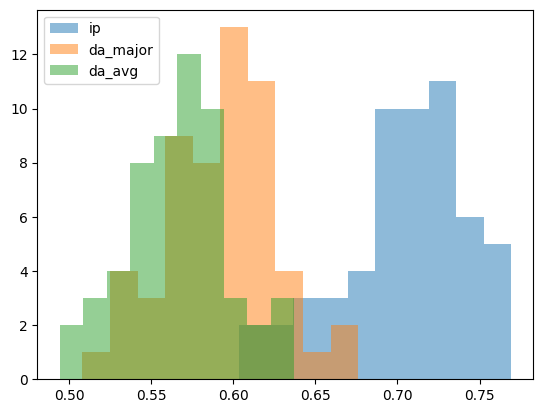

In [62]:
plt.hist(ip_ctrl['gratio_avg'], alpha=0.5, label='ip')
plt.hist(da_major_ctrl['gratio_avg'], alpha=0.5, label='da_major')
plt.hist(da_avg_ctrl['gratio_avg'], alpha=0.5, label='da_avg')

plt.legend()
plt.show()

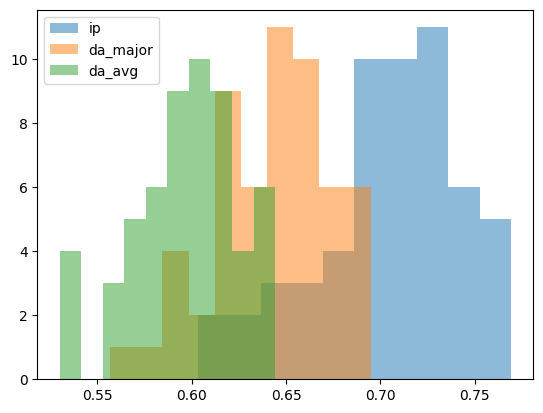

In [63]:
plt.hist(ip_ctrl['gratio_avg'], alpha=0.5, label='ip')
plt.hist(da_full_major_ctrl['gratio_avg'], alpha=0.5, label='da_major')
plt.hist(da_full_avg_ctrl['gratio_avg'], alpha=0.5, label='da_avg')

plt.legend()
plt.show()